# Ice-Edge Evaluation Prototypes
Logged training losses for same problem description:
- IceNet: focal loss
- Prediction of Pan-Arctic Sea Ice Using Attention-Based LSTM Neural Networks: MSE + MAE
- Daily-Scale Prediction of Arctic Sea Ice Concentration Based on Recurrent Neural Network Models: Still figuring out

In Prediction of Pan-Arctic Sea Ice Using Attention-Based LSTM Neural Networks, they do evaluate the model's performance with Integrated Ice Edge Error (IIEE, Goessling et al., 2016). "The IIEE is deﬁned as the sum of ocean areas where the presence of sea ice (deﬁned with a 15% SIC threshold) is overestimated and underestimated with respect to the observations. In other words, this veriﬁcation metric describes the area where the forecasts and observations disagree on the presence of sea ice with concentration being above or below 15%."

In Daily-Scale Prediction of Arctic Sea Ice Concentration Based on Recurrent Neural Network Models, the model is evaluated with a few typical metrics, but also three of the recommended ones from Melsom et al, 2019.

The integrated ice-edge error involves several maxima, likely not differentiable?  
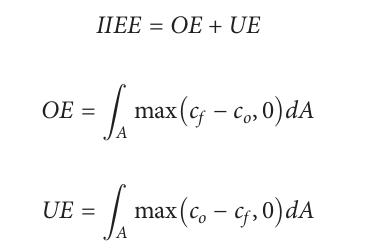

In [5]:
import numpy as np

In [6]:
def average_ice_edge_displacement(observed_edges, model_edges):
    """
    Calculate the average ice edge displacement (D_AVG_IE) between observed and model ice edges.
    Credit: Validation metrics for ice edge position forecasts, Melsom et al., 2019.

    Parameters:
    - observed_edges: numpy array of shape (N, 2), where N is the number of observed ice edge points,
      and each point is represented by its (x, y) coordinates.
    - model_edges: numpy array of shape (M, 2), where M is the number of model ice edge points,
      and each point is represented by its (x, y) coordinates.

    Returns:
    - D_AVG_IE: The average displacement between the observed and model ice edges.
    """

    # Initialize lists to store minimum distances for each point
    observed_to_model_distances = []
    model_to_observed_distances = []

    # Calculate distances from each observed point to the nearest model point
    for obs_point in observed_edges:
        distances = np.sqrt(np.sum((model_edges - obs_point) ** 2, axis=1))
        observed_to_model_distances.append(np.min(distances))

    # Calculate distances from each model point to the nearest observed point
    for model_point in model_edges:
        distances = np.sqrt(np.sum((observed_edges - model_point) ** 2, axis=1))
        model_to_observed_distances.append(np.min(distances))

    # Calculate the average displacement
    avg_displacement = (
        np.mean(observed_to_model_distances) + np.mean(model_to_observed_distances)
    ) / 2

    return avg_displacement

In [7]:
# Example usage:
# Assuming we have two sets of points representing the observed and model ice edges
# For demonstration, let's define simple arrays representing these points
observed_edges = np.array([[1, 1], [2, 2], [3, 3]])
model_edges = np.array([[1.1, 1.1], [2.1, 2.1], [3.1, 3.1]])

# Calculate the average ice edge displacement
D_AVG_IE = average_ice_edge_displacement(observed_edges, model_edges)
D_AVG_IE

0.14142135623730964